# Neural network with Pytorch

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import torch # PyTorch

<IPython.core.display.Javascript object>


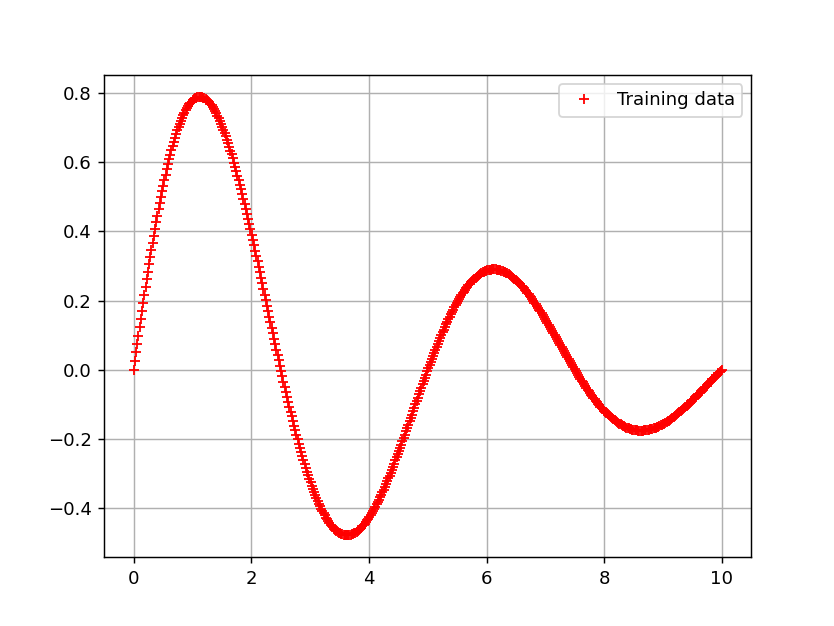

In [2]:

def fun(x):
    """
    A target function that we want our NN to learn.
    """
    return np.sin(2. * np.pi / 5 * x) * np.exp(-x/5)
    
xt = np.linspace(0., 10., 500)
yt = fun(xt)

plt.figure()
plt.plot(xt, yt, "+r", label = "Training data")
plt.legend()
plt.grid()
plt.show()

In [16]:
# NEURAL NETWORK CREATION
# Our NN has 1 input and 1 output

layers = [torch.nn.Linear(1, 6, bias = True),
          torch.nn.ELU(),
          torch.nn.Linear(6, 9, bias = True),
          torch.nn.ELU(),
          torch.nn.Linear(9, 9, bias = True),
          torch.nn.ELU(),
          torch.nn.Linear(9, 6, bias = True),
          torch.nn.ELU(),
          torch.nn.Linear(6, 1, bias = True)] 
model = torch.nn.Sequential(*layers)

In [17]:
Xt = torch.Tensor(xt[:, None]) # Input training
Yt = torch.Tensor(yt[:, None]) # Output expected value

In [18]:
loss_func = torch.nn.MSELoss(reduction = "mean")
optimizer = torch.optim.Adam(model.parameters(), # Optimizable parameters
                                lr = 1.e-3 ) # Learning rate: tweak if needed

In [19]:
from matplotlib import animation

# LEARNING
Nsteps = 10000 # Number of learning steps
steps = np.arange(Nsteps)
losses = np.zeros(Nsteps)



for s in range(Nsteps):
    Ye = model(Xt) # Do inference = estiate Ye with the model in the current state.
    loss = loss_func(Ye, Yt)
    losses[s] = loss
    optimizer.zero_grad() # Reset the gradient in the optimizer
    loss.backward() # Calculate the gradient using backward propagation.
    optimizer.step()
    if s % 1000 == 0:
        print("Step s={0} => Loss e={1}".format(s, loss))
        #[l.remove() for l in ax.lines]
        #ax.plot(steps, losses)
      

Step s=0 => Loss e=0.19418951869010925
Step s=1000 => Loss e=0.004319487605243921
Step s=2000 => Loss e=7.485329115297645e-05
Step s=3000 => Loss e=3.7262969271978363e-05
Step s=4000 => Loss e=2.606031921459362e-05
Step s=5000 => Loss e=2.0874796973657794e-05
Step s=6000 => Loss e=1.8076349078910425e-05
Step s=7000 => Loss e=1.6307332771248184e-05
Step s=8000 => Loss e=1.4899104826326948e-05
Step s=9000 => Loss e=1.3740625036007259e-05


<IPython.core.display.Javascript object>


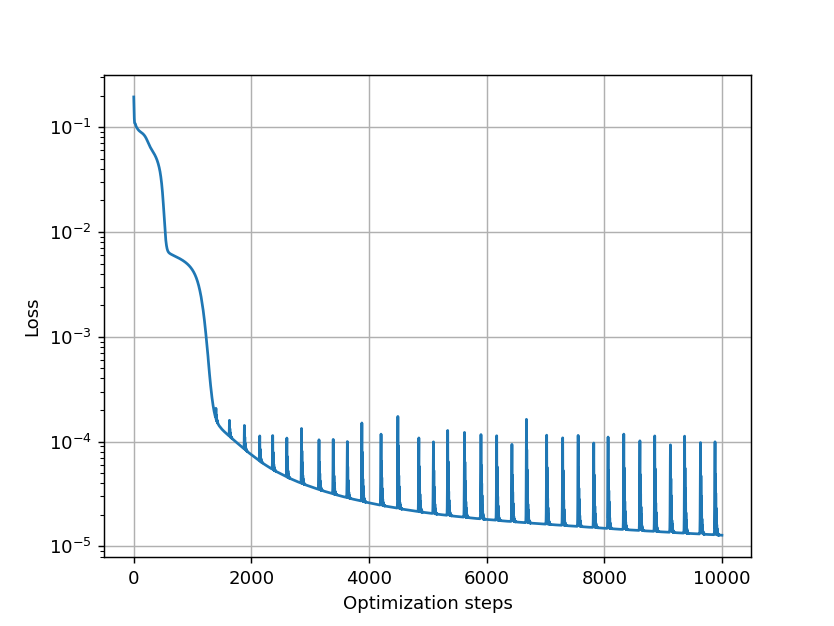

In [20]:
  
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(steps, losses)
#plt.ylim(0, 1)
plt.yscale("log")
plt.ylabel("Loss")
plt.xlabel("Optimization steps")
plt.grid()
plt.show()        

In [21]:
# TEST THE MODEL
xv = np.linspace(0., 10., 995)
yv = model(torch.Tensor(xv[:, None])).data.numpy().flatten()
yth = fun(xv)

<IPython.core.display.Javascript object>


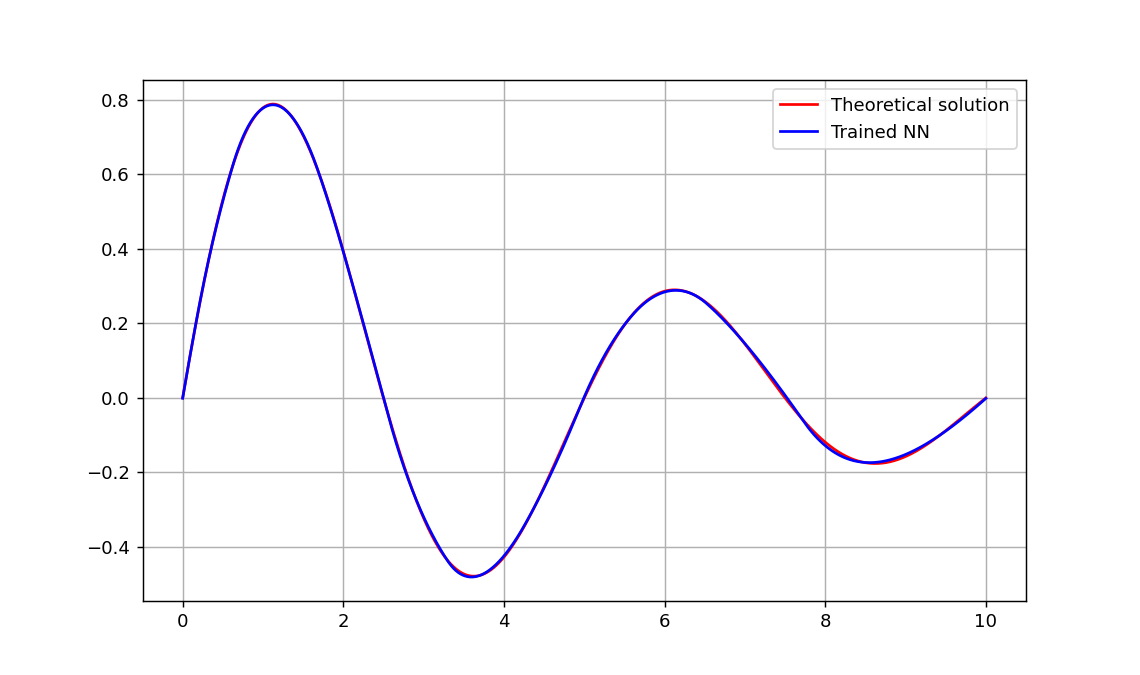

In [22]:
plt.figure()
plt.plot(xv, yth, "-r", label = "Theoretical solution")
plt.plot(xv, yv, "-b", label = "Trained NN")
plt.grid()
plt.legend()
plt.show()

In [27]:
layers[2].weight

Parameter containing:
tensor([[ 0.3084,  0.2540,  0.5166,  0.2335,  0.3558,  0.3019],
        [-0.4384, -0.0116,  0.2672, -0.6991, -0.3215,  0.8323],
        [ 0.2507, -0.1610, -0.1937,  0.0068,  0.4512, -0.0976],
        [ 0.5720,  0.0882,  0.3113,  0.1687, -0.0133,  0.8466],
        [-1.2345,  0.2221, -0.6883,  0.2707, -0.0749, -0.3708],
        [-0.3862,  0.0636, -0.3730,  0.3894, -0.1113, -0.2177],
        [ 1.0643,  0.4325,  0.4613,  0.6117,  0.3887,  0.2943],
        [-1.0233, -0.7577, -0.7123, -0.5254,  0.2216, -1.2453],
        [ 0.5868, -0.1605,  0.0921,  0.1429,  0.1649,  0.0026]],
       requires_grad=True)